#                         Bolywood Celebrity Image Classification

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [8]:
img  = cv2.imread("./test_images/kriti1.jpg")
img.shape

(194, 259, 3)

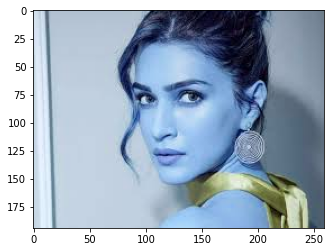

In [9]:
plt.imshow(img)

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(194, 259)

In [11]:
gray

array([[218, 225, 226, ..., 127, 127, 126],
       [218, 225, 226, ..., 127, 127, 126],
       [218, 226, 226, ..., 127, 127, 127],
       ...,
       [219, 215, 216, ...,  98,  98,  98],
       [219, 215, 216, ...,  98,  98,  98],
       [219, 215, 216, ...,  98,  98,  98]], dtype=uint8)

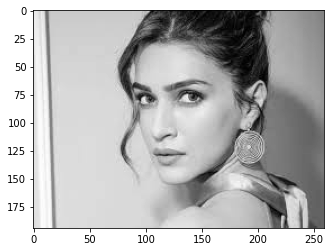

In [12]:
plt.imshow(gray, cmap="gray")

In [13]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 58,  28, 126, 126]], dtype=int32)

In [14]:
(x,y,w,h) = faces[0]
x,y,w,h

(58, 28, 126, 126)

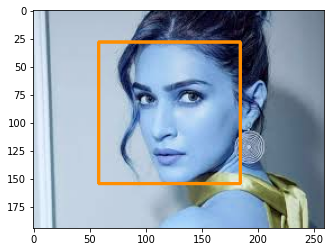

In [15]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,142,0),2)
plt.imshow(face_img)

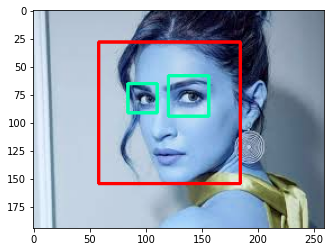

In [16]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,169),2)
        

plt.figure()
plt.imshow(face_img)
plt.show()

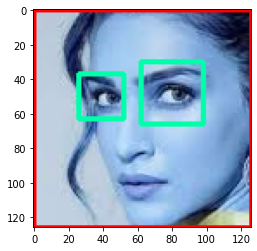

In [17]:
%matplotlib inline
plt.imshow(roi_color)

In [18]:
# merge all these things into a function to run for every images 
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

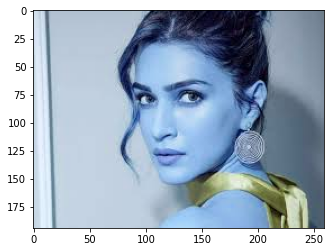

In [19]:
original_image = cv2.imread('./test_images/kriti1.jpg')
plt.imshow(original_image)

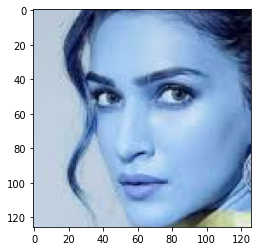

In [20]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/kriti1.jpg')
plt.imshow(cropped_image)

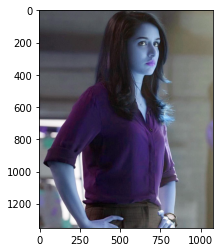

In [21]:
org_image_obstructed = cv2.imread('./test_images/sk2.jpg')
plt.imshow(org_image_obstructed)

In [22]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/sk2.jpg')
cropped_image_no_2_eyes

In [30]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [31]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [32]:
img_dirs

['./dataset/AyushK',
 './dataset/HrithikRoshan',
 './dataset/KritiSanon',
 './dataset/ShraddhaKapoor',
 './dataset/SRK']

In [33]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

#            Data Cleaning Phase

In [34]:
# create cropped images for model training

cropped_image_dirs = []
celebrity_file_names_dict = {}

#loop through every dataset directory
for img_dir in img_dirs:
    print("Directory : ",img_dir)
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print("Celebrity : ",celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    #loop to scan images from respective directory
    for entry in os.scandir(img_dir):
        # print("Now =>",entry)
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name   #location of new folder to store cropped images
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)   # save the new image
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)  # add to dictionary
            count += 1  

Directory :  ./dataset/AyushK
Celebrity :  AyushK
Generating cropped images in folder:  ./dataset/cropped/AyushK
Directory :  ./dataset/HrithikRoshan
Celebrity :  HrithikRoshan
Generating cropped images in folder:  ./dataset/cropped/HrithikRoshan
Directory :  ./dataset/KritiSanon
Celebrity :  KritiSanon
Generating cropped images in folder:  ./dataset/cropped/KritiSanon
Directory :  ./dataset/ShraddhaKapoor
Celebrity :  ShraddhaKapoor
Generating cropped images in folder:  ./dataset/cropped/ShraddhaKapoor
Directory :  ./dataset/SRK
Celebrity :  SRK
Generating cropped images in folder:  ./dataset/cropped/SRK


In [35]:
celebrity_file_names_dict

{'AyushK': ['./dataset/cropped/AyushK/AyushK1.png',
  './dataset/cropped/AyushK/AyushK2.png',
  './dataset/cropped/AyushK/AyushK3.png',
  './dataset/cropped/AyushK/AyushK4.png',
  './dataset/cropped/AyushK/AyushK5.png',
  './dataset/cropped/AyushK/AyushK6.png',
  './dataset/cropped/AyushK/AyushK7.png',
  './dataset/cropped/AyushK/AyushK8.png',
  './dataset/cropped/AyushK/AyushK9.png',
  './dataset/cropped/AyushK/AyushK10.png',
  './dataset/cropped/AyushK/AyushK11.png',
  './dataset/cropped/AyushK/AyushK12.png',
  './dataset/cropped/AyushK/AyushK13.png',
  './dataset/cropped/AyushK/AyushK14.png',
  './dataset/cropped/AyushK/AyushK15.png',
  './dataset/cropped/AyushK/AyushK16.png',
  './dataset/cropped/AyushK/AyushK17.png',
  './dataset/cropped/AyushK/AyushK18.png',
  './dataset/cropped/AyushK/AyushK19.png',
  './dataset/cropped/AyushK/AyushK20.png',
  './dataset/cropped/AyushK/AyushK21.png',
  './dataset/cropped/AyushK/AyushK22.png',
  './dataset/cropped/AyushK/AyushK23.png',
  './datas

In [36]:
cropped_image_dirs

['./dataset/cropped/AyushK',
 './dataset/cropped/HrithikRoshan',
 './dataset/cropped/KritiSanon',
 './dataset/cropped/ShraddhaKapoor',
 './dataset/cropped/SRK']

#          Wavelet Transform

#  In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc


In [37]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

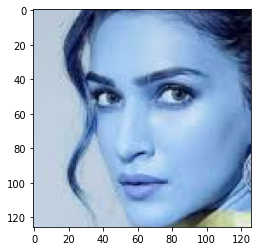

In [38]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/kriti1.jpg')
plt.imshow(cropped_image)

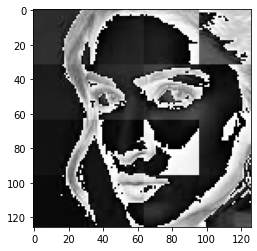

In [39]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

# You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier

In [51]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'AyushK': 0,
 'HrithikRoshan': 1,
 'KritiSanon': 2,
 'ShraddhaKapoor': 3,
 'SRK': 4}

In [45]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        # print(training_image)
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        # vertically stacking original image and it's wavelet transformmed image
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [42]:
len(X)

498

In [44]:
len(X[0])   #because 32 * 32 * 3 + 32 * 32

4096

In [46]:
len(y)

498

In [47]:
y[0]

0

In [48]:
# doing this to avoid some sklearn warnings
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(498, 4096)

In [49]:
X[0]

array([242., 243., 239., ...,  38.,   4.,  16.])

# Now Train Our Model

# We will use SVM with rbf kernel tuned with heuristic finetuning

In [53]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# pipeline creation to scale objects and and svm classifier
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.728

In [55]:
len(X_test)

125

In [56]:
print(classification_report(y_test, pipe.predict(X_test)))
# it gives reports person wise from my dataset

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        23
           1       0.81      0.86      0.83        29
           2       0.64      0.86      0.74        29
           3       0.83      0.42      0.56        24
           4       0.61      0.55      0.58        20

    accuracy                           0.73       125
   macro avg       0.74      0.71      0.71       125
weighted avg       0.74      0.73      0.72       125



# Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [57]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [58]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [59]:
# here we have tried various models using GridSearchCV to check which model is best for our dataset
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.852685,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.638198,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.833910,{'logisticregression__C': 1}


In [60]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [61]:
best_estimators['svm'].score(X_test,y_test)

0.72

In [62]:
best_estimators['random_forest'].score(X_test,y_test)

0.544

In [63]:
best_estimators['logistic_regression'].score(X_test,y_test)


0.736

In [66]:
best_clf = best_estimators['svm']     # we can choose either of svm and logistic_regression as our model classifier

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[21,  0,  0,  0,  2],
       [ 1, 22,  0,  0,  6],
       [ 0,  0, 24,  4,  1],
       [ 0,  0, 13, 10,  1],
       [ 2,  4,  1,  0, 13]], dtype=int64)

Text(69.0, 0.5, 'Truth')

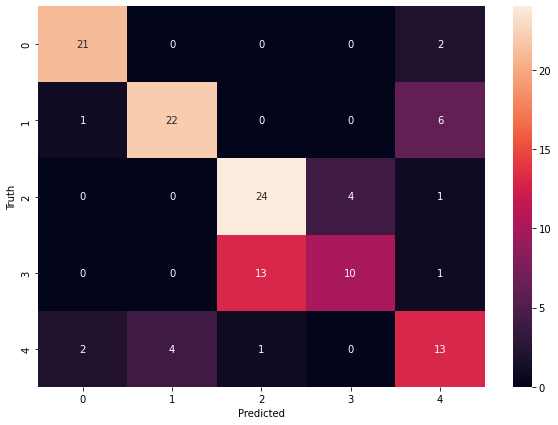

In [70]:
# basically this plot infers for how many times truth value is same as predicted values
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [71]:
class_dict

{'AyushK': 0,
 'HrithikRoshan': 1,
 'KritiSanon': 2,
 'ShraddhaKapoor': 3,
 'SRK': 4}

# Save The Trained Model

In [73]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

# Save Class Dictionary

In [74]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))